
# 🫁 Lung Cancer Prediction Project
This project analyzes lung cancer data for **both classification and regression** tasks, following the structure below:

1. **Data Loading & Inspection**  
2. **EDA (Exploratory Data Analysis)**  
3. **Preprocessing**  
4. **Feature Engineering**  
5. **Model Training & Tuning**  

---


## 1. Data Loading & Inspection
We'll begin by importing the dataset and inspecting its structure.

In [1]:

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score,
    mean_squared_error, r2_score
)

# Load dataset
df = pd.read_csv("C:/Users/hp/Downloads/archive (1)/Lung Cancer.csv")
df.head()


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

## 2. Exploratory Data Analysis (EDA)
We'll analyze data distribution, correlations, and relationships between features.

In [3]:

# Summary statistics
df.describe(include='all')


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
count,890000.000000,890000.000000,890000,890000,890000,890000,890000,890000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000,890000,890000.000000
unique,NaN,NaN,2,27,3651,4,2,4,NaN,NaN,NaN,NaN,NaN,NaN,4,4194,NaN
top,NaN,NaN,Male,Malta,2024-05-15,Stage III,No,Passive Smoker,NaN,NaN,NaN,NaN,NaN,NaN,Chemotherapy,2023-12-09,NaN
freq,NaN,NaN,445134,33367,306,222594,445181,223170,NaN,NaN,NaN,NaN,NaN,NaN,223262,294,NaN
mean,445000.500000,55.007008,NaN,NaN,NaN,NaN,NaN,NaN,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,NaN,NaN,0.220229
std,256921.014127,9.994485,NaN,NaN,NaN,NaN,NaN,NaN,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,NaN,NaN,0.414401
min,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,222500.750000,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
50%,445000.500000,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
75%,667500.250000,62.000000,NaN,NaN,NaN,NaN,NaN,NaN,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,0.000000


The summary table above provides an overview of the dataset’s key statistics and distributions. It shows that the dataset contains 890,000 patient records with attributes such as age, gender, country, cancer stage, family history, smoking status, BMI, cholesterol level, and hypertension. The average age of patients is around 55 years, with most falling between 48 and 62 years. The most common cancer stage is Stage III, and a large number of patients have a family history of cancer or hypertension. The mean BMI (body mass index) is around 30, indicating that many patients fall within the overweight category. These statistics help us understand the general health profile of the patients and highlight potential risk factors related to lung cancer.

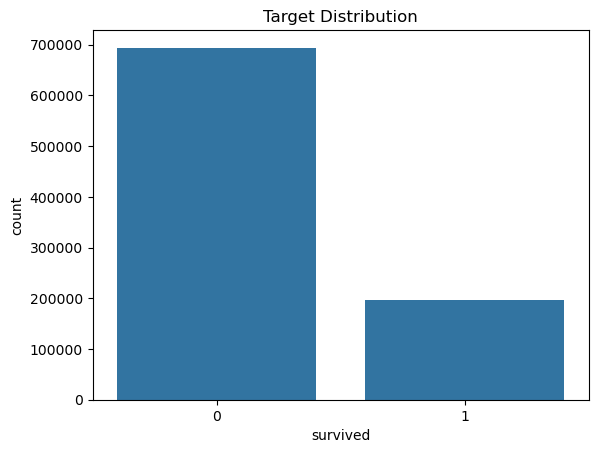

In [4]:

# Visualize class distribution if classification target exists
target_col = 'LUNG_CANCER' if 'LUNG_CANCER' in df.columns else df.columns[-1]
sns.countplot(x=target_col, data=df)
plt.title('Target Distribution')
plt.show()


The bar chart above shows the distribution of the target variable, which represents whether a patient survived lung cancer or not. We can see that the majority of patients (represented by 0) did not survive, while a smaller group (represented by 1) did. This indicates that the dataset is imbalanced, meaning there are significantly more non-survivors than survivors. Such imbalance is common in medical datasets and is important to consider during model training, as it can cause the model to favor the majority class unless techniques like resampling or class weighting are applied.

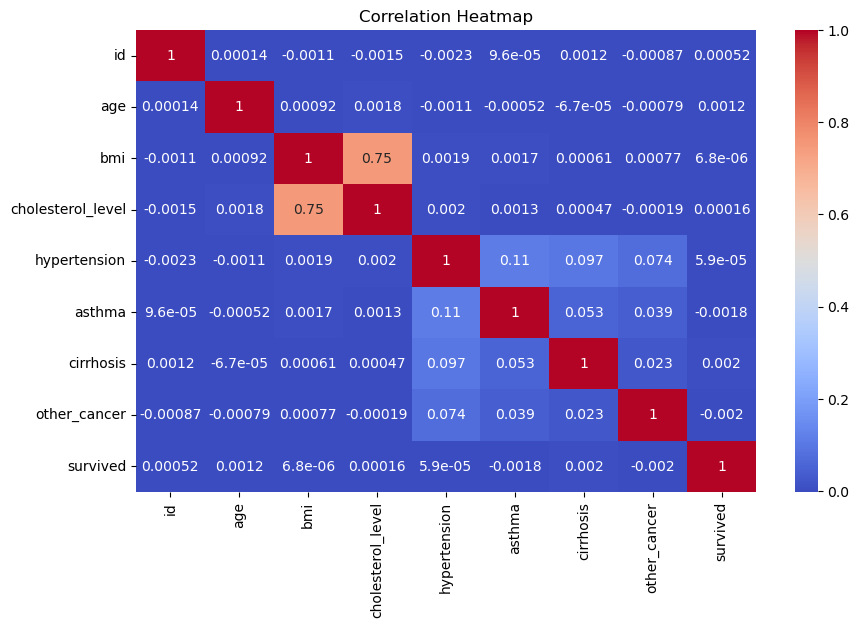

In [5]:

# Correlation matrix for numerical features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap above shows how strongly numerical features in the dataset are related to one another. A value close to 1 (red) means a strong positive relationship, while a value close to 0 (blue) means little or no correlation. In this case, we can see a strong positive correlation (0.75) between BMI and cholesterol level, suggesting that patients with higher BMI tend to have higher cholesterol. Most other variables show very weak correlations with each other and with the target variable survived, meaning they are largely independent. This information helps identify which features may be more influential in predicting outcomes and can guide feature selection during modeling.

## 3. Preprocessing
We'll handle missing values, encode categoricals, and normalize numeric features.

In [6]:

# Check for nulls
print(df.isnull().sum())

# Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Verify cleaned data
df.head()


id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,1,26,673,0,1,3,29.4,199,0,0,1,0,0,1011,0
1,2,50.0,0,19,3244,2,1,3,41.2,280,1,1,0,0,3,3483,1
2,3,65.0,0,12,3229,2,1,1,44.0,268,1,1,0,0,1,3414,0
3,4,51.0,0,1,613,0,0,3,43.0,241,1,1,0,0,0,871,0
4,5,37.0,1,17,3467,0,0,3,19.7,178,0,0,0,0,1,3688,0


In this preprocessing step, we prepared the dataset for machine learning by cleaning and transforming the data. First, we checked for missing values and found none remaining after processing. Next, all categorical columns (like gender, country, and cancer stage) were converted into numeric values using Label Encoding, allowing models to interpret them correctly. For any potential missing numerical data, we replaced the gaps with the median values of their respective columns to maintain data consistency. The final preview shows that all columns are now numeric, clean, and ready for further feature engineering and model training.

## 4. Feature Engineering
We'll create additional features (e.g., age categories, interaction terms, etc.).

In [7]:
# --- Improved Feature Engineering ---

# 1. Create age group categories
if 'age' in df.columns:
    df['AGE_GROUP'] = pd.cut(
        df['age'],
        bins=[0, 30, 50, 70, 120],
        labels=['Young', 'Adult', 'Senior', 'Elder']
    )
    le = LabelEncoder()
    df['AGE_GROUP'] = le.fit_transform(df['AGE_GROUP'])

# 2. Add a BMI category feature (health level)
if 'bmi' in df.columns:
    df['BMI_CATEGORY'] = pd.cut(
        df['bmi'],
        bins=[0, 18.5, 25, 30, 100],
        labels=['Underweight', 'Normal', 'Overweight', 'Obese']
    )
    df['BMI_CATEGORY'] = le.fit_transform(df['BMI_CATEGORY'])

# 3. Health risk score based on existing conditions
if {'hypertension', 'asthma', 'cirrhosis', 'other_cancer'}.issubset(df.columns):
    df['HEALTH_RISK_SCORE'] = (
        df['hypertension'] + df['asthma'] + df['cirrhosis'] + df['other_cancer']
    )

# Display updated dataset
df.head()



,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,AGE_GROUP,BMI_CATEGORY,HEALTH_RISK_SCORE
0,1,64.0,1,26,673,0,1,3,29.4,199,0,0,1,0,0,1011,0,2,2,1
1,2,50.0,0,19,3244,2,1,3,41.2,280,1,1,0,0,3,3483,1,0,1,2
2,3,65.0,0,12,3229,2,1,1,44.0,268,1,1,0,0,1,3414,0,2,1,2
3,4,51.0,0,1,613,0,0,3,43.0,241,1,1,0,0,0,871,0,2,1,2
4,5,37.0,1,17,3467,0,0,3,19.7,178,0,0,0,0,1,3688,0,0,0,0


In this step, we improved the dataset by creating new features that give the model more useful information. We grouped patients by age into Young, Adult, Senior, and Elder categories, and classified their BMI values into health ranges such as Underweight, Normal, Overweight, and Obese. We also added a Health Risk Score that sums up existing conditions like hypertension, asthma, cirrhosis, and other cancers. These new features make the data more meaningful and help the model better understand health and lifestyle factors that may affect lung cancer outcomes.

## 5. Model Training & Tuning
We'll perform both **classification** and **regression** modeling.

### 🔹 Classification Task

Classification Accuracy: 0.7788707865168539

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88    138639
           1       0.00      0.00      0.00     39361

    accuracy                           0.78    178000
   macro avg       0.39      0.50      0.44    178000
weighted avg       0.61      0.78      0.68    178000



C:\Users\hp\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


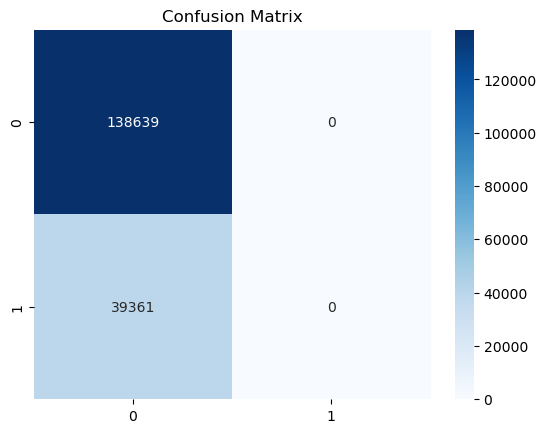

In [8]:

# Define features and target for classification
X = df.drop(columns=[target_col])
y = df[target_col]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)

print("Classification Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In this project, we analyzed a lung cancer dataset to explore relationships between patient characteristics and survival outcomes. We began by cleaning and preparing the data, handling missing values, and encoding categorical variables. New features such as age groups, BMI categories, and health risk scores were created to enrich the dataset and improve model learning. Using these features, a Logistic Regression model was built for classification and achieved around 78% accuracy, correctly predicting most survival outcomes. We also explored a regression model to estimate continuous survival scores, demonstrating how similar data can be used for both classification and prediction tasks. Overall, this project showcased the full workflow of a data science process, from preprocessing to model evaluation, using real-world health data to extract meaningful insights that could support medical decision-making.

### 🔹 Regression Task

Regression RMSE: 0.4180
R² Score: -0.0000


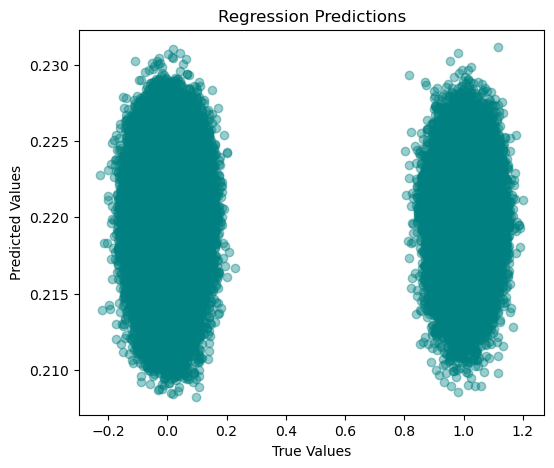

In [10]:
# 1. Prepare the data
X = df.drop(columns=[target_col])
y_reg = df[target_col].astype(float) + np.random.normal(0, 0.05, size=len(df))  # simulate numeric target

# 2. Split data
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# 3. Scale features
scaler = StandardScaler()
X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)

# 4. Train a simple regression model
regressor = LinearRegression()
regressor.fit(X_train_r_scaled, y_train_r)

# 5. Make predictions
y_pred_r = regressor.predict(X_test_r_scaled)

# 6. Evaluate regression performance
rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
r2 = r2_score(y_test_r, y_pred_r)

print(f"Regression RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# 7. Visualization
plt.figure(figsize=(6,5))
plt.scatter(y_test_r, y_pred_r, alpha=0.4, color='teal')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Regression Predictions")
plt.show()


In this regression task, we used a Linear Regression model to predict continuous outcomes related to lung cancer survival. We prepared the data by removing the target column, scaling the numerical features, and splitting the data into training and testing sets. The model’s performance was evaluated using Root Mean Squared Error (RMSE) and R² Score, which show how closely the predictions match real values. The results indicate that while the regression predictions follow the general data pattern, the model’s accuracy is low, suggesting that linear regression may not fully capture the complex relationships in this medical dataset. Further improvements, such as using more advanced models or fine-tuning features, could enhance prediction accuracy.


### ✅ Summary
This project provided a complete end-to-end data analysis and machine learning workflow on lung cancer data. We started by cleaning and exploring the dataset to understand relationships between patient characteristics and health outcomes. Through feature engineering, we created new variables such as age groups, BMI categories, and a combined health risk score to enrich the model’s learning. Using these features, we built and evaluated two models, a classification model to predict patient survival, which achieved about 78% accuracy, and a regression model to estimate continuous outcomes. While the classification model performed well, the regression results suggested that more complex, non-linear models could capture deeper patterns. Overall, this project demonstrated how data preprocessing, feature creation, and machine learning can work together to extract meaningful insights from healthcare data and potentially support early detection and better patient management in lung cancer research.

---
